In [1]:
from scipy.spatial import ConvexHull
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

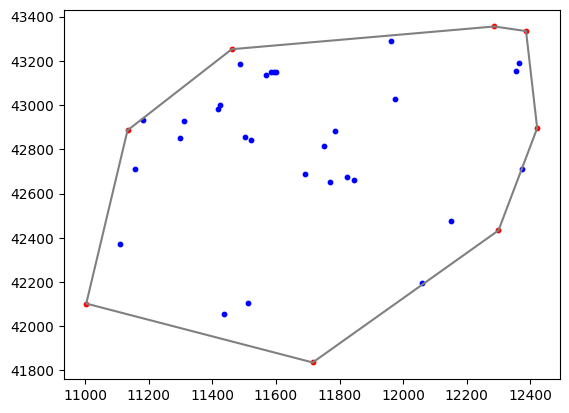

In [26]:
file_path = r'C:\Users\Lenovo\Desktop\TSP-Solution\dataset\dj38.tsp'

with open(file_path, 'r') as file:
    lines = file.readlines()

lines = lines[10: -1]
points = list()
for line in lines:
    tmp_point = line.strip().split(' ')
    tmp_point = [float(x) for x in tmp_point]
    tmp_point[0] = int(tmp_point[0])
    points.append([tmp_point[1], tmp_point[2]])
    
point_num = len(points)

hull = ConvexHull(points)
    
x_values = [points[i][0] for i in range(len(points)) if i in hull.vertices]
y_values = [points[i][1] for i in range(len(points)) if i in hull.vertices]
plt.scatter(x_values, y_values, marker='o', color='r', s=10)

x_values = [points[i][0] for i in range(len(points)) if i not in hull.vertices]
y_values = [points[i][1] for i in range(len(points)) if i not in hull.vertices]
plt.scatter(x_values, y_values, marker='o', color='b', s=10)

x_values = [points[hull.vertices[i]][0] for i in range(-1, len(hull.vertices))]
y_values = [points[hull.vertices[i]][1] for i in range(-1, len(hull.vertices))]

plt.plot(x_values, y_values, color='grey')  # 绘制边框

plt.show()

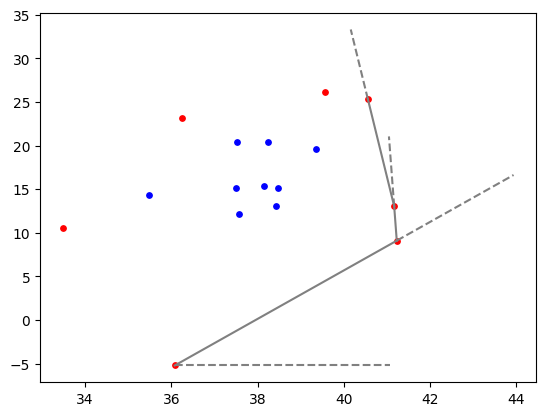

In [31]:
file_path = r'..\dataset\ulysses16.tsp'

with open(file_path, 'r') as file:
    lines = file.readlines()

lines = lines[7: -1]
points = list()
for line in lines:
    tmp_point = line.strip().split(' ')
    tmp_point = [float(x) for x in tmp_point]
    tmp_point[0] = int(tmp_point[0])
    points.append([tmp_point[1], tmp_point[2]])
    
point_num = len(points)

hull = ConvexHull(points)
    
x_values = [points[i][0] for i in range(len(points)) if i in hull.vertices]
y_values = [points[i][1] for i in range(len(points)) if i in hull.vertices]
plt.scatter(x_values, y_values, marker='o', color='r', s=15)

x_values = [points[i][0] for i in range(len(points)) if i not in hull.vertices]
y_values = [points[i][1] for i in range(len(points)) if i not in hull.vertices]
plt.scatter(x_values, y_values, marker='o', color='b', s=15)

# for tmp_i in range(1, len(hull.vertices) + 1):
for tmp_i in range(1, 4):
    i = tmp_i % len(hull.vertices)
    j = (i + 1) % len(hull.vertices)
    plt.plot([points[hull.vertices[i]][0], points[hull.vertices[j]][0]],
            [points[hull.vertices[i]][1], points[hull.vertices[j]][1]], color='grey')
    if i == 1:
        plt.plot([points[hull.vertices[i]][0], points[hull.vertices[i]][0] + 5],
                [points[hull.vertices[i]][1], points[hull.vertices[i]][1]], 
                linestyle='--', color='grey')

    delta_y = 5 if points[hull.vertices[j]][1] > points[hull.vertices[i]][1] else -5
    delta_x = delta_y * (points[hull.vertices[j]][0] - points[hull.vertices[i]][0]) / (
        points[hull.vertices[j]][1] - points[hull.vertices[i]][1])
    length = np.linalg.norm([delta_x, delta_y])
    delta_x = delta_x / length * 8
    delta_y = delta_y / length * 8
    plt.plot([points[hull.vertices[j]][0], points[hull.vertices[j]][0] + delta_x],
            [points[hull.vertices[j]][1], points[hull.vertices[j]][1] + delta_y], 
            linestyle='--', color='grey')

# plt.plot([36.08, 41.08], [-5.21, -5.21], linestyle='--', color='grey')
# plt.plot([36.08, 41.23], [-5.21, 9.10], color='grey')
# plt.plot([41.23, 44.23], [9.10, 17.4359], linestyle='--', color='grey')
# plt.plot([41.23, 41.17], [9.10, 13.05], color='grey')
# plt.plot([41.17, 41.018], [13.05, 23.05], linestyle='--', color='grey')
# plt.plot([41.17, 40.56], [13.05, 25.32], color='grey')

plt.show()